<a href="https://colab.research.google.com/github/ItzmeOmeGa/Sdss_galaxy_classification/blob/master/SDSS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Install required packages
!pip install pandas scikit-learn matplotlib seaborn joblib


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                           confusion_matrix,
                           classification_report)
import joblib


In [32]:
try:
    df = pd.read_csv('sdss_100k_galaxy_form_burst.csv', sep=',', skiprows=[0])
    print("✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")

    # Display first 3 rows
    display(df.head(3))

except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Data loaded successfully!
Dataset shape: (100000, 43)


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030


In [26]:
print("Columns in dataset:")
print(df.columns.tolist())

df = df.rename(columns={
    'class': 'galaxy_type',
    'redshift': 'z'
})


Columns in dataset:
['#Table1']


In [29]:

try:
    with open('sdss_100k_galaxy_form_burst.csv', 'r') as f:
        for i in range(5):  # Read and print the first 5 lines
            print(f.readline())
except Exception as e:
    print(f"❌ Error reading file: {e}")

#Table1

objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err

1237646587710669400,8175185722644649984,82.0386790197966,0.847177136346427,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,7.82364,18.63581,34.98175,50.64961,2.969037,4.252946,3.101782,3.46188,3.071923,2.559197,8.499634,30.32594,17.24706,36.44688,1.984029,1.835038,1.438609,1.638081,1.289375,22.58631,20.752,21.66492,20.07646,19.43575,0.09995142,0.3118636,0.2893703,0.270588,0.1871822,GALAXY,STARFORMING,0.06774854,1.485608E-05

1237646588247540577,8175186822156277760,82.138894235229,1.06307163479155,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,18.70364,33.76298,50.25997,60.73625,2.18690

In [35]:
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err']


In [38]:
target_column = 'class'
redshift_column = 'z'

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in data")
if redshift_column not in df.columns:
    print(f"⚠ Warning: Redshift column '{redshift_column}' not found")

/tmp/ipython-input-41-1890777247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_column, palette='viridis')


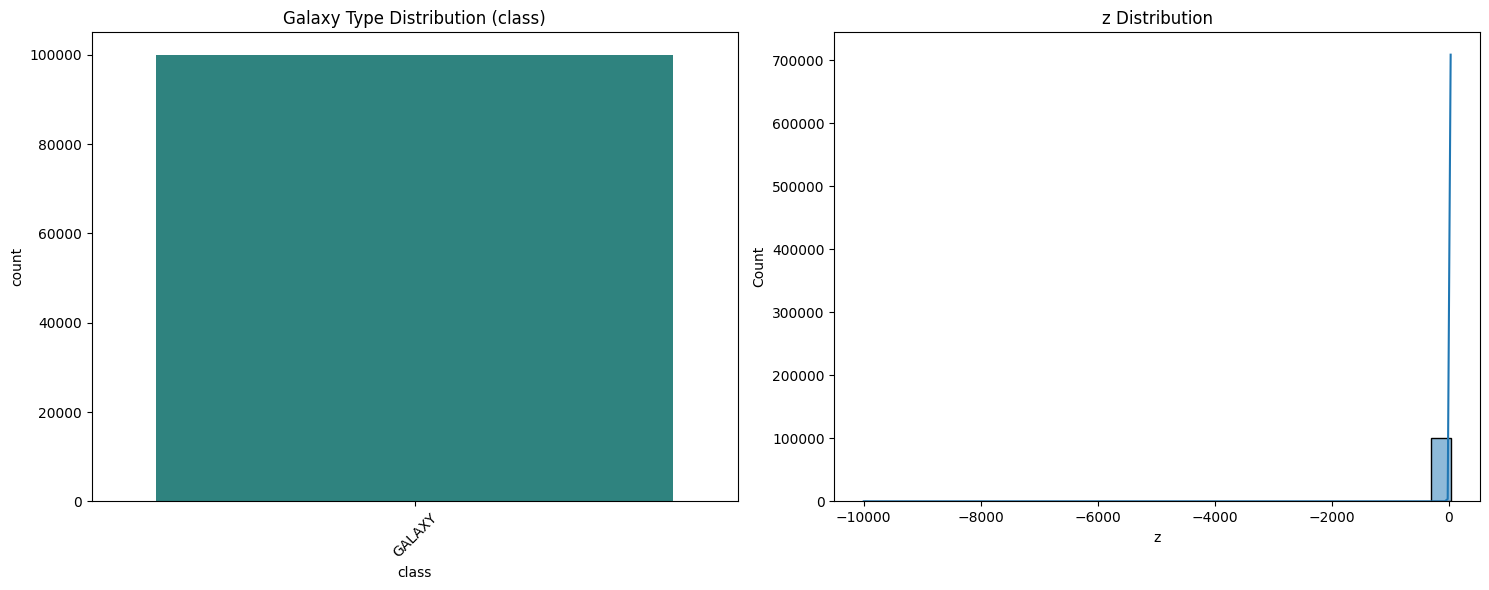

In [41]:
plt.figure(figsize=(15, 6))

# 1. Galaxy type distribution
plt.subplot(1, 2, 1)
try:
    sns.countplot(data=df, x=target_column, palette='viridis')
    plt.title(f'Galaxy Type Distribution ({target_column})')
    plt.xticks(rotation=45)
except Exception as e:
    print(f" Error plotting galaxy types: {e}")
    # Alternative plot if countplot fails
    df[target_column].value_counts().plot(kind='bar')
    plt.title('Galaxy Type Counts')

# 2. Redshift distribution (if column exists)
plt.subplot(1, 2, 2)
if redshift_column in df.columns:
    sns.histplot(df[redshift_column], bins=30, kde=True)
    plt.title(f'{redshift_column} Distribution')
else:
  plt.text(0.5, 0.5, 'No redshift data available',
             ha='center', va='center')
  plt.title('Redshift Data Missing')

plt.tight_layout()
plt.show()

In [49]:
X = df.drop(columns=[target_column, 'objid', 'specobjid', 'subclass'])  # Exclude metadata columns and subclass
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print("✅ Data split successfully!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

✅ Data split successfully!
Training samples: 80000
Test samples: 20000


In [50]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Handles imbalanced classes
    n_jobs=-1  # Uses all CPU cores
)

print("⏳ Training model...")
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

⏳ Training model...
✅ Model trained successfully!



🔍 Model Evaluation:
📊 Accuracy: 100.00%


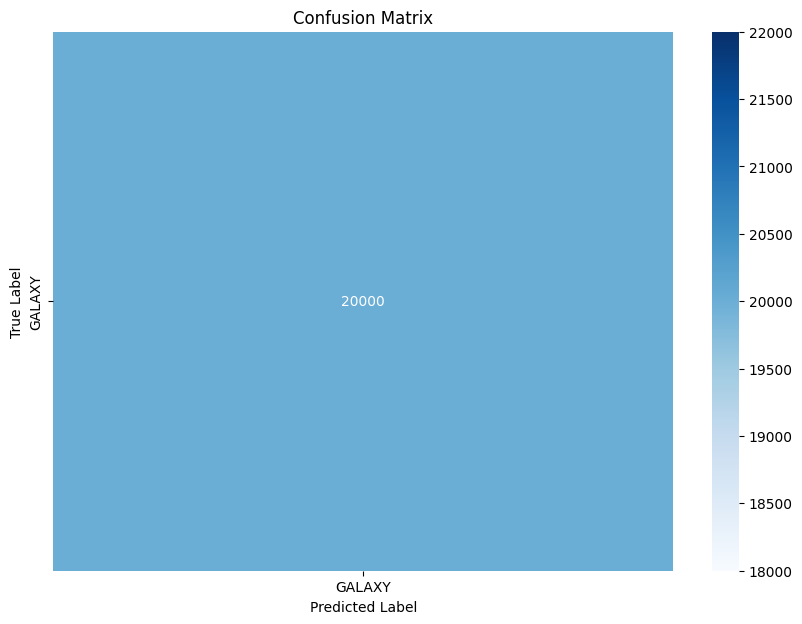


📝 Classification Report:
              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     20000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [51]:
# Model Evaluation
print("\n🔍 Model Evaluation:")
y_pred = model.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy: {accuracy:.2%}")

# 2. Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. Classification Report
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))


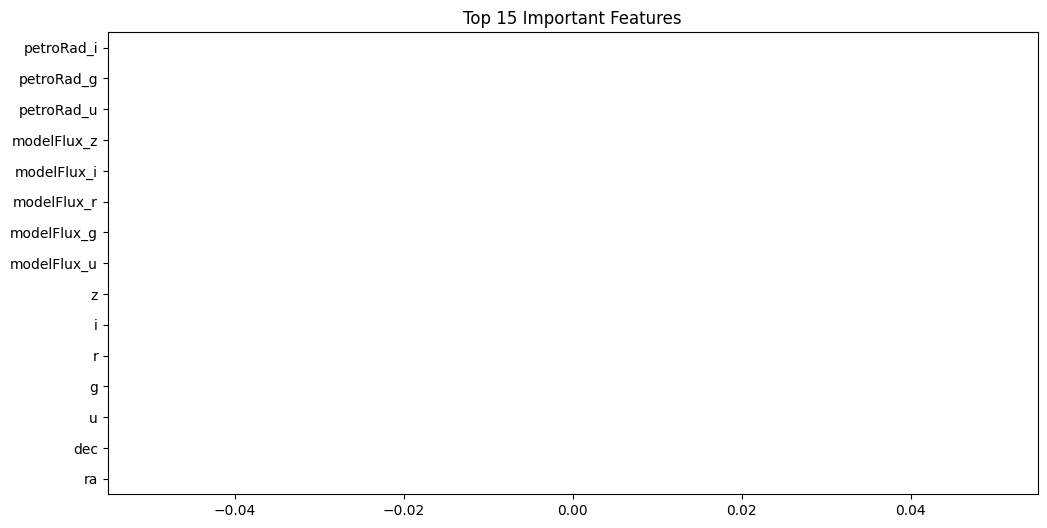

In [52]:
plt.figure(figsize=(12,6))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Important Features')
plt.show()

In [53]:
joblib.dump(model, "galaxy_classifier.pkl")
print("💾 Model saved as galaxy_classifier.pkl")

try:
    from google.colab import files
    files.download("galaxy_classifier.pkl")
    print(" Model downloaded!")
except:
    pass

💾 Model saved as galaxy_classifier.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Model downloaded!
